## 1. About the project 
The Nobel Prize is perhaps the worlds most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?

Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016.

In [11]:
# Loading the libraries and the data 
library(tidyverse)
library(tidyr)
library(dplyr)
library(lubridate)
# Load the data
nobel <- read_csv("C:/Users/Atolb/Downloads/nobel.csv")
# Print the first 2 rows
head(nobel,2)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  year = col_double(),
  category = col_character(),
  prize = col_character(),
  motivation = col_character(),
  prize_share = col_character(),
  laureate_id = col_double(),
  laureate_type = col_character(),
  full_name = col_character(),
  birth_date = col_date(format = ""),
  birth_city = col_character(),
  birth_country = col_character(),
  sex = col_character(),
  organization_name = col_character(),
  organization_city = col_character(),
  organization_country = col_character(),
  death_date = col_date(format = ""),
  death_city = col_character(),
  death_country = col_character()
)



year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services he has rendered by the discovery of the laws of chemical dynamics and osmotic pressure in solutions""",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composition, which gives evidence of lofty idealism, artistic perfection and a rare combination of the qualities of both heart and intellect""",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NA,NA,NA,1907-09-07,Châtenay,France


## 2.  So, who gets the Nobel Prize?
Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented?

In [3]:
# Counting the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
nobel %>% 
summarize(count=n())

# Counting the number of prizes won by male and female recipients.
nobel %>%
    group_by(sex) %>%
summarize(count=n())

# Counting the number of prizes won by different nationalities.
nobel %>%
group_by(birth_country)%>%
summarize(count=n()) %>%
arrange(desc(count)) %>%
head(20)

count
911


sex,count
Female,49
Male,836
NA,26


birth_country,count
United States of America,259
United Kingdom,85
Germany,61
France,51
Sweden,29
NA,26
Japan,24
Canada,18
Netherlands,18
Italy,17


## 3. USA dominance
Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the laureates were European. When did the USA start to dominate the Nobel Prize charts?



year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,proportion
1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services he has rendered by the discovery of the laws of chemical dynamics and osmotic pressure in solutions""",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,FALSE,1900,0.01785714
1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composition, which gives evidence of lofty idealism, artistic perfection and a rare combination of the qualities of both heart and intellect""",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,...,Male,NA,NA,NA,1907-09-07,Châtenay,France,FALSE,1900,0.01785714
1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its application against diphtheria, by which he has opened a new road in the domain of medical science and thereby placed in the hands of the physician a victorious weapon against illness and deaths""",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,FALSE,1900,0.01785714
1901,Peace,The Nobel Peace Prize 1901,NA,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,...,Male,NA,NA,NA,1910-10-30,Heiden,Switzerland,FALSE,1900,0.01785714
1901,Peace,The Nobel Peace Prize 1901,NA,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,...,Male,NA,NA,NA,1912-06-12,Paris,France,FALSE,1900,0.01785714
1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services he has rendered by the discovery of the remarkable rays subsequently named after him""",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),...,Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany,FALSE,1900,0.01785714


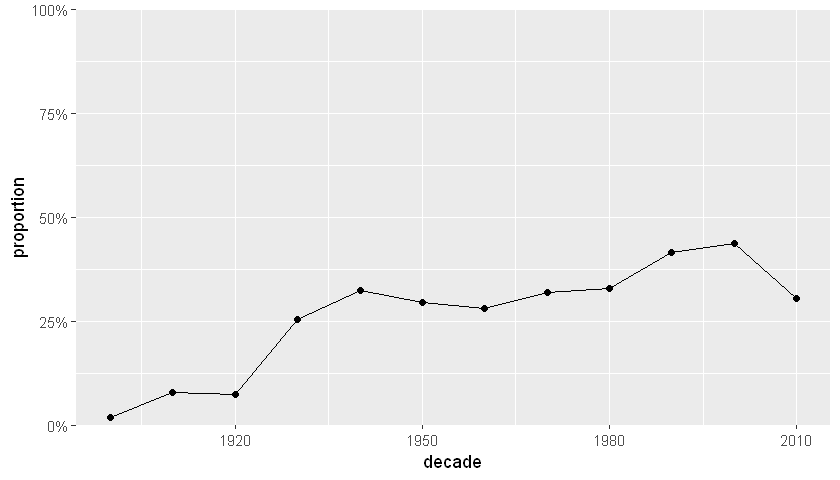

In [4]:
# Calculating the proportion of USA born winners per decade
prop_usa_winners <- nobel %>% 
mutate(usa_born_winner = birth_country =='United States of America') %>%
mutate(decade = floor(year/10) * 10) %>%
group_by(decade) %>%
mutate(proportion=mean(usa_born_winner,na.rm=TRUE))

# Display the proportions of USA born winners per decade
head(prop_usa_winners)

# Setting the size of plots in this notebook
options(repr.plot.width=7, repr.plot.height=4)

# Plotting USA born winners
ggplot(prop_usa_winners,aes(x=decade,y=proportion))+geom_line() + geom_point() +
scale_y_continuous(labels=scales::percent,limits=0:1,expand=c(0,0))


## 4. What is the gender of a typical Nobel Prize winner?
Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the laureates were European. When did the USA start to dominate the Nobel Prize charts?

So the USA became the dominating winner of the Nobel Prize first in the 1930s and has kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are men. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?


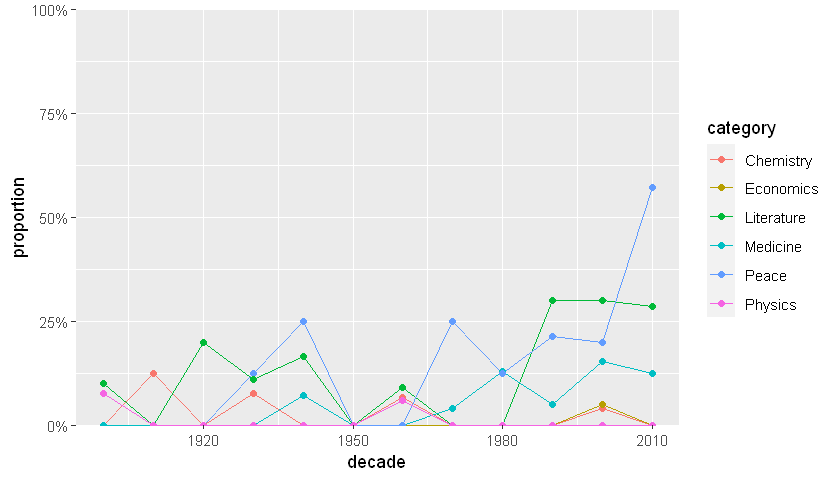

In [5]:
# Calculating the proportion of female laureates per decade
prop_female_winners <- nobel %>%
mutate(female_winner = sex =='Female') %>%
mutate(decade = floor(year/10) * 10) %>%
group_by(decade,category) %>%
mutate(proportion=mean(female_winner,na.rm=TRUE))  

# Plotting the proportion of female laureates per decade
ggplot(prop_female_winners,aes(x=decade,y=proportion,color=category))+geom_line() + geom_point() +
scale_y_continuous(labels=scales::percent,limits=0:1,expand=c(0,0))

## 5. The first woman to win the Nobel Prize
The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.

Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?

In [6]:
# Picking out the first woman to win a Nobel Prize
nobel %>%
 filter(sex=="Female") %>% 
top_n(1,desc(year))

year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services they have rendered by their joint researches on the radiation phenomena discovered by Professor Henri Becquerel""",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NA,NA,NA,1934-07-04,Sallanches,France


## 6. Repeat laureates
For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and there are few that have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)

In [7]:
# Selecting the laureates that have received 2 or more prizes.
nobel %>%
    group_by(full_name) %>%
count() %>% 
filter(n>=2)

full_name,n
Comité international de la Croix Rouge (International Committee of the Red Cross),3
Frederick Sanger,2
John Bardeen,2
Linus Carl Pauling,2
"Marie Curie, née Sklodowska",2
Office of the United Nations High Commissioner for Refugees (UNHCR),2


## 7.  How old are you when you get the prize?
The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.

But how old are you generally when you get the prize?

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 28 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 28 rows containing missing values (geom_point)."

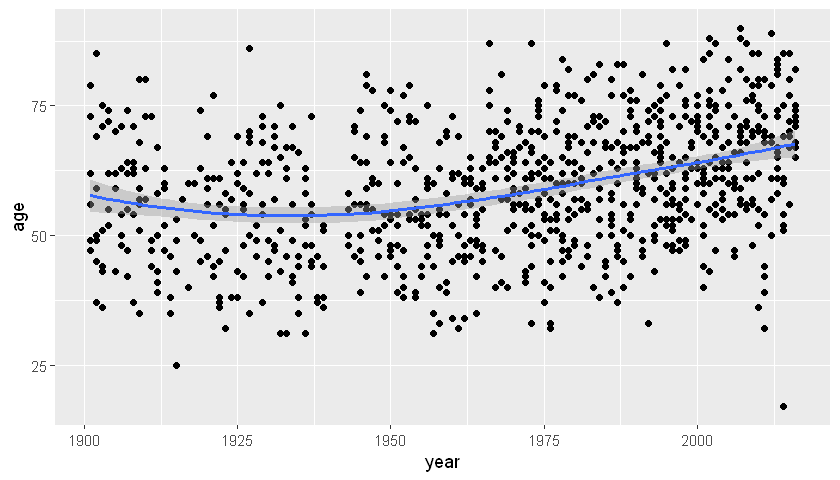

In [8]:
# Loading the lubridate package
library(lubridate)

# Calculating the age of Nobel Prize winners
nobel_age <- nobel %>%
    mutate(age=year-year(birth_date))

# Plotting the age of Nobel Prize winners
ggplot(nobel_age,aes(year,age)) + geom_point() + geom_smooth()

## 8.  Age differences between prize categories
The plot above shows us a lot! We see that people use to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the laureates' ages, and while most are 50+, some are very young.

We also see that the density of points is much high nowadays than in the early 1900s -- nowadays many more of the prizes are shared, and so there are many more winners. We also see that there was a disruption in awarded prizes around the Second World War (1939 - 1945).

Let's look at age trends within different prize categories.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 28 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 28 rows containing missing values (geom_point)."

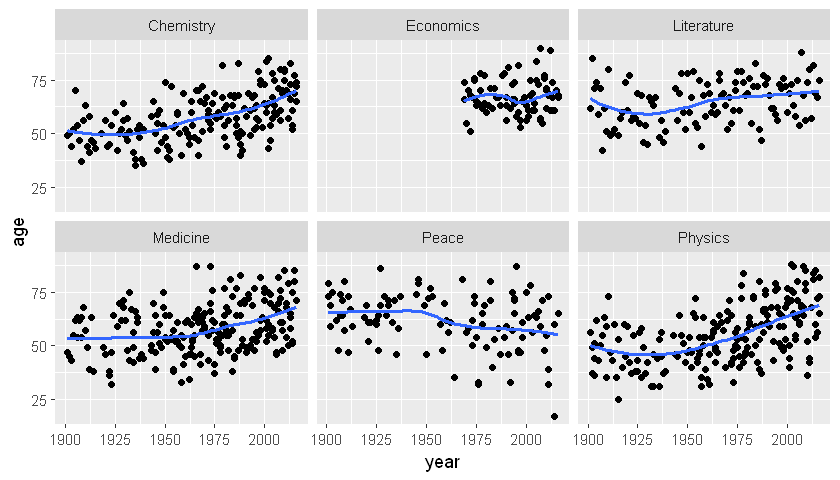

In [9]:
# Same plot as above, but faceted by the category of the Nobel Prize
ggplot(nobel_age,aes(year,age)) + geom_point() + geom_smooth(se=FALSE) +
facet_wrap(~category)

## 9.Oldest and youngest winners
Another plot with lots of exciting stuff going on! We see that both winners of the chemistry, medicine, and physics prize have gotten older over time. The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. Literature and economics are more stable, and we also see that economics is a newer category. But peace shows an opposite trend where winners are getting younger!

In the peace category we also a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?

In [10]:
# The oldest winner of a Nobel Prize as of 2016
nobel_age %>% top_n(1,age)

# The youngest winner of a Nobel Prize as of 2016
nobel_age %>% top_n(1,desc(age))

year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
2007,Economics,The Sveriges Riksbank Prize in Economic Sciences 2007,"""for having laid the foundations of mechanism design theory""",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,Russia,Male,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,90


year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of children and young people and for the right of all children to education""",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,NA,NA,NA,NA,NA,NA,17
